In [1]:
 #Load libraries
import numpy
import numpy as np
import math
from numpy import arange
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_theme(style="ticks",color_codes=True)
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor,XGBRFRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

## ****Title: Boston Housing Data****
1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

    Download file : https://github.com/rotimi2020/Boston-Prediction/blob/main/Boston.csv
            
3. Relevant Information:

   Concerns housing values in suburbs of Boston.

4. Number of Instances: 506

5. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

6. Attribute Information:
* CRIM: capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town 
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) 
* NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* RM: average number of rooms per dwelling 
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
*  RAD: index of accessibility to radial highways 
*  TAX: full-value property-tax rate per $10,000 [$/10k] 
*  PTRATIO: pupil-teacher ratio by town 
*  B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
*  LSTAT: % lower status of the population 
* MEDV: Median value of owner-occupied homes in $1000's [k$]
    
7. Missing Attribute Values:  None.

## -------Boston Data Prediction-------

<br> The First part of notebook deals with checking out </br> 
1. Nunique
2. Duplicated rows
3. Multicollinearity(correlation)

<br> Also the Second part of notebook deals with  </br> 
1. EDA
2. Transformation(Target)
3. Feature Selection  using Mutual Info Regression
4. Feature importance
5. removal of Outliers

<br> Finally the Third part of notebook deals with training/prediction </br> 
For this prediction, we will try out the following ensemble algorithm

1. AdaBoost Regression
2. ExtraTrees Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. Light GradientBoosting Regression
6. CatBoost Regression 

In [2]:
#import dataset
df=pd.read_csv('Boston.csv')



In [3]:
# view dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# shape
print("shape of train dataset",df.shape)


shape of train dataset (506, 14)


In [5]:
# types
set_option('display.max_rows', 500)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [6]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [7]:
# summarize the number of unique values in each column
print(df.nunique())

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64


In [8]:
# locate rows of duplicate data
df.duplicated().any()

False

## Features Engineering

### Inputation

In [9]:
#missing values of test dataset

total = df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()*100/len(df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,keys=['Total', 'Percent'])
missing_data

,Total,Percent
MEDV,0,0.0
LSTAT,0,0.0
B,0,0.0
PTRATIO,0,0.0
TAX,0,0.0
RAD,0,0.0
DIS,0,0.0
AGE,0,0.0
RM,0,0.0
NOX,0,0.0


# Multicollinearity(correlation)

Text(0.5, 1.0, 'Correlation Matrix(for dataset)')

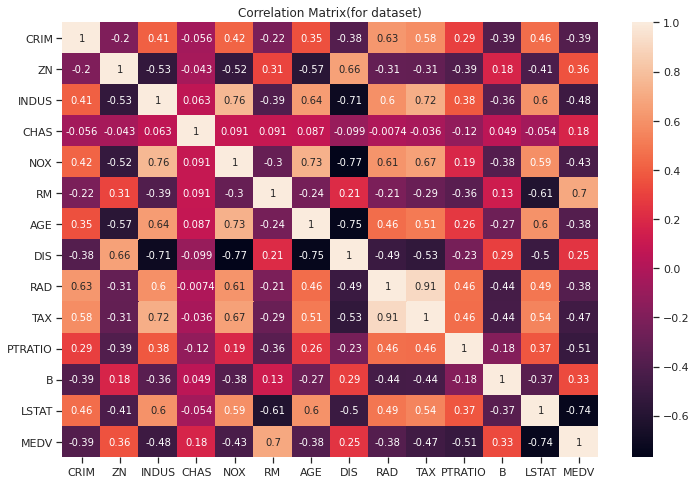

In [10]:
#Correlation for numeric
df_corr=df.copy()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr.corr(),annot=True)
plt.title("Correlation Matrix(for dataset)")

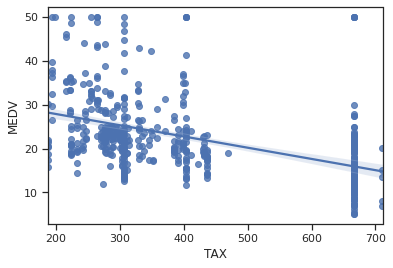

In [11]:
sns.regplot(data=df_corr,x="TAX",y="MEDV")

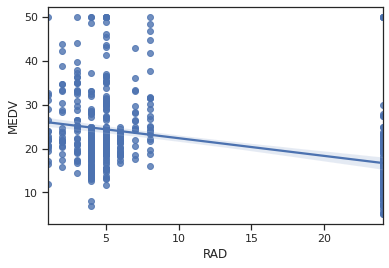

In [12]:
sns.regplot(data=df_corr,x="RAD",y="MEDV")

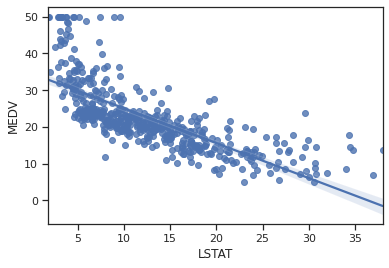

In [13]:
sns.regplot(data=df_corr,x="LSTAT",y="MEDV")

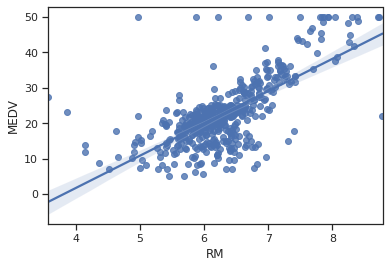

In [14]:
sns.regplot(data=df_corr,x="RM",y="MEDV")

In [15]:
### check multicolinearity 
def correlation (df_corr,threshold):
    col_corr=set() # names of correlated columns
    corr_matrix=df_corr.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

corr=correlation(df_corr,0.85)
len(set(corr))

1

In [16]:
#variable should be deleted(highly correlated)
print(corr)

{'TAX'}


In [17]:
#dropping of column(Tax) 
df_corr.drop(columns=corr,axis=1,inplace=True)
df.drop(columns=corr,axis=1,inplace=True)

In [18]:
# VIF to check for highly corrrelated variable
#VIF of 1 show not correlation
#VIF of 2-4 show moderately correlated
#VIF of 5 means higly correlated(variable should be deleted)

#df=train.select_dtypes(exclude="object")
def get_VIF(dataFrame,target):
    X = add_constant(dataFrame.loc[:,dataFrame.columns != target])
    so=pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index = X.columns,)
    return so
target = "MEDV"
print(get_VIF(df_corr,target))

const      578.264
CRIM         1.792
ZN           2.184
INDUS        3.226
CHAS         1.058
NOX          4.369
RM           1.923
AGE          3.098
DIS          3.954
RAD          2.837
PTRATIO      1.789
B            1.348
LSTAT        2.941
dtype: float64


### Visualization before preprocessing

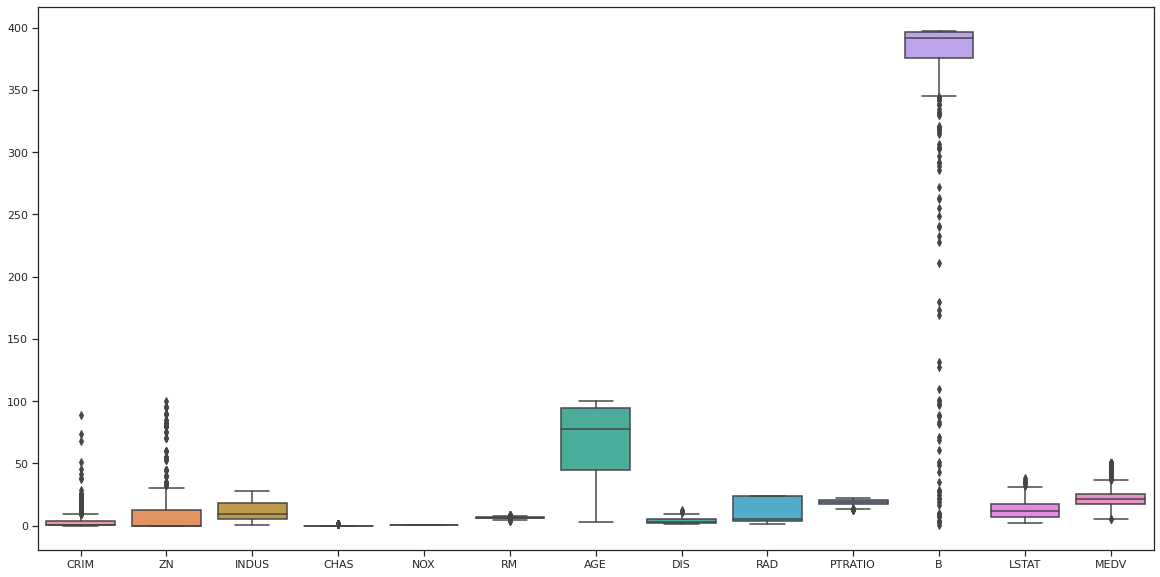

In [19]:
# boxplot
train_viz=df.copy()
cols=list(train_viz.columns)
plt.figure(figsize=(20,10))
sns.boxplot(data=train_viz)

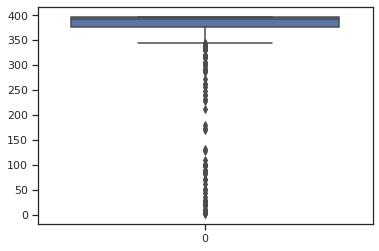

In [20]:
sns.boxplot(data=train_viz["B"])

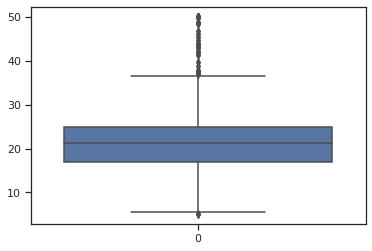

In [21]:
sns.boxplot(data=train_viz["MEDV"])

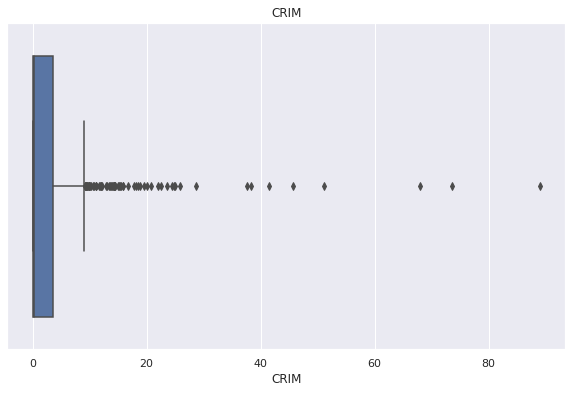

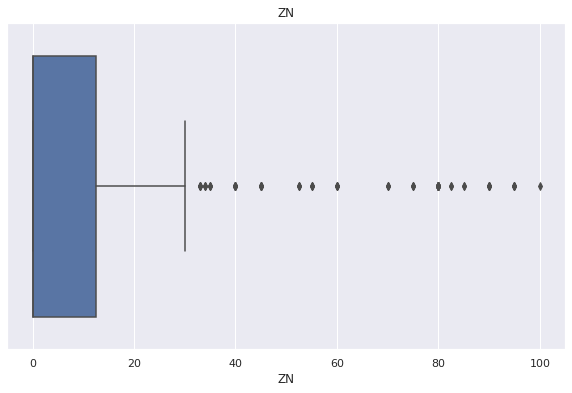

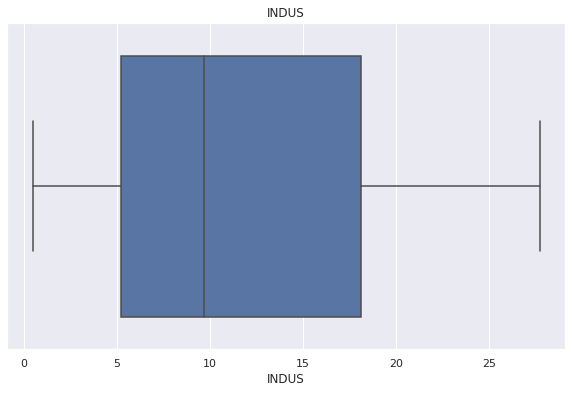

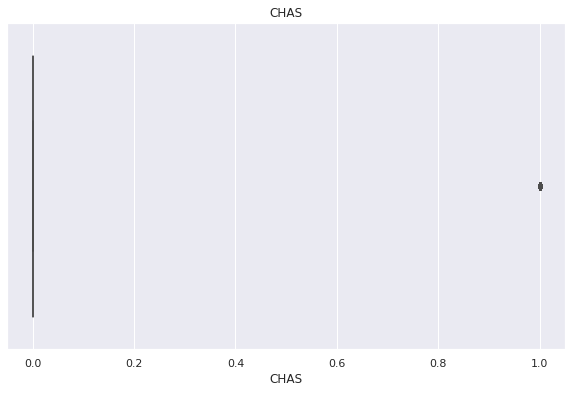

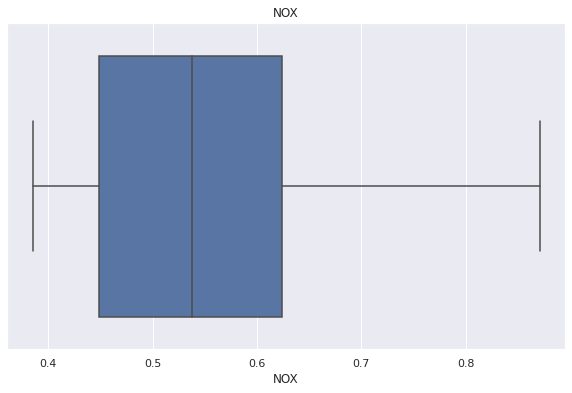

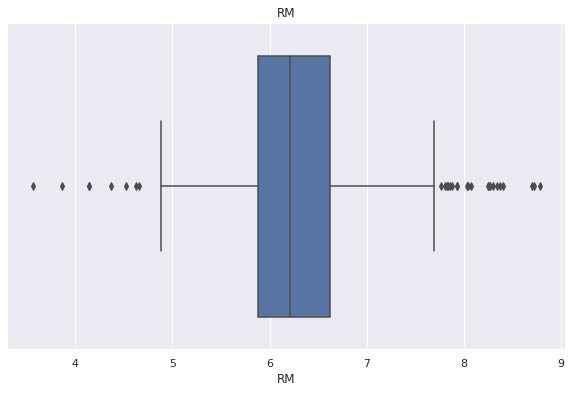

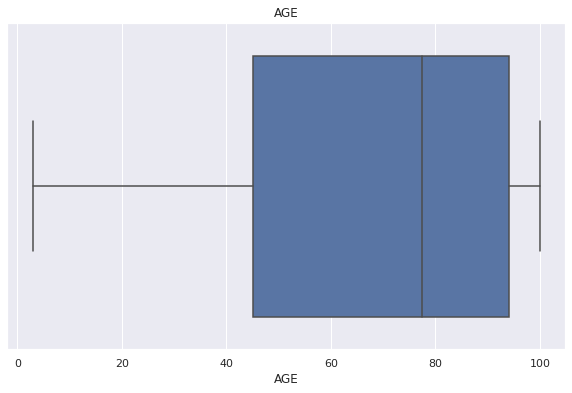

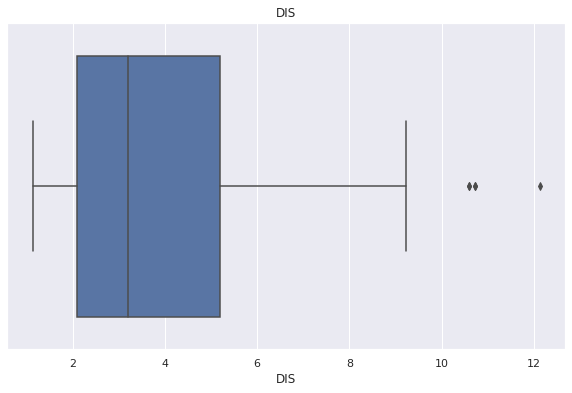

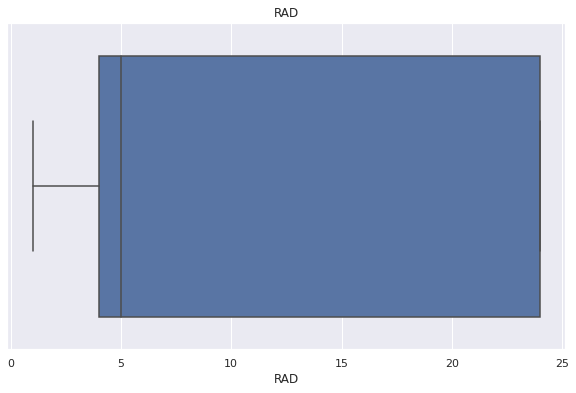

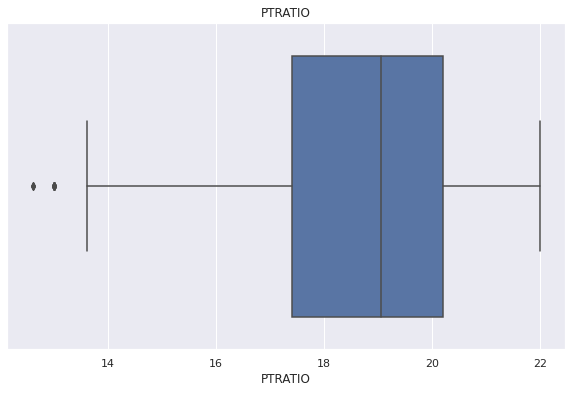

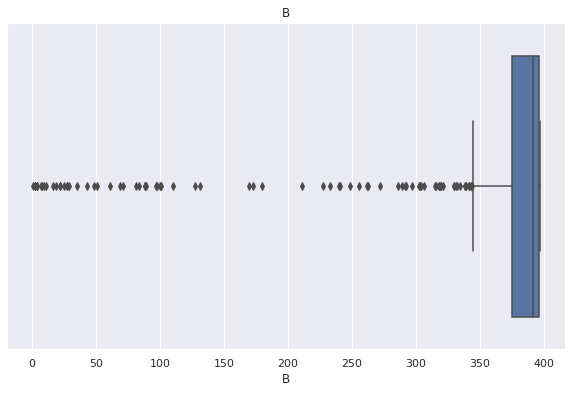

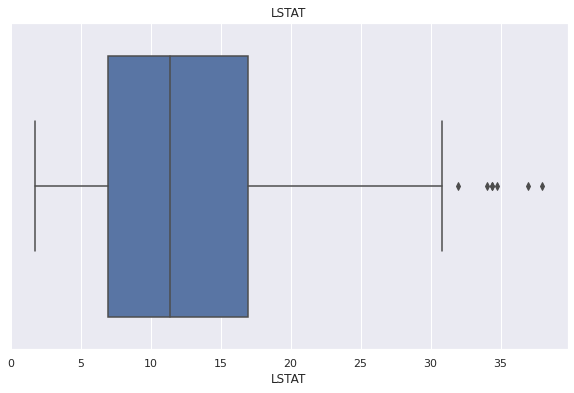

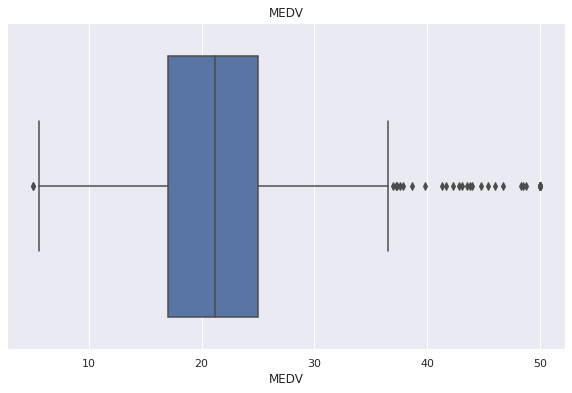

In [22]:
#Boxplot for checking of outliers
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.boxplot(train_viz[col])
    plt.title(col)
    plt.show()

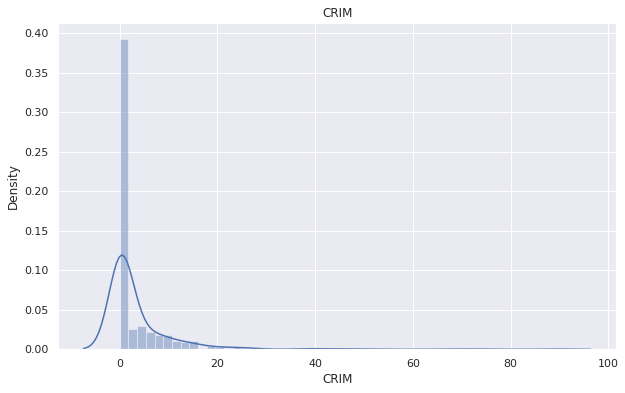

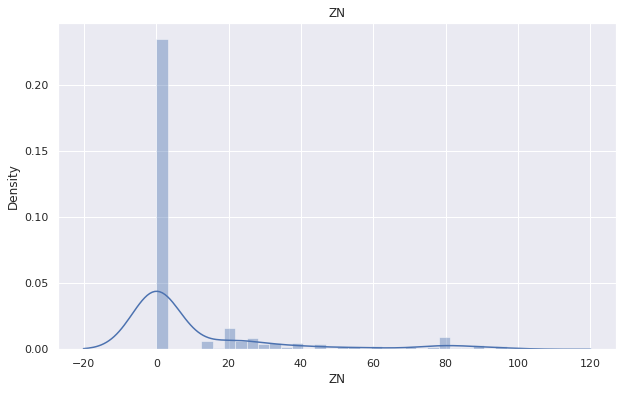

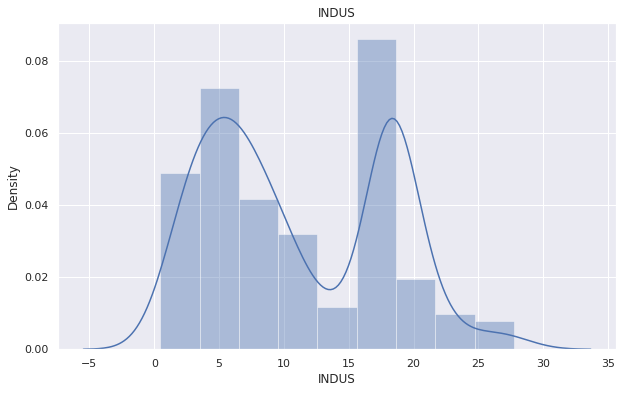

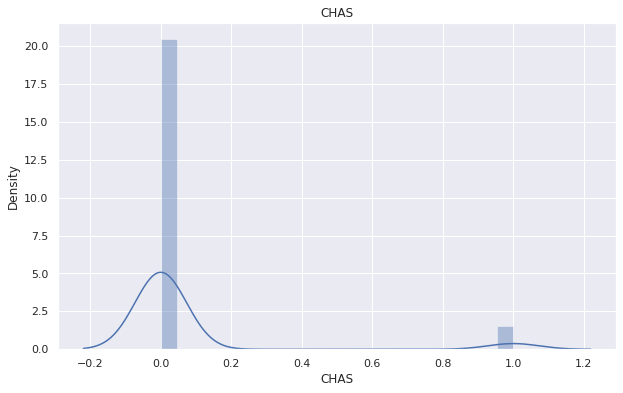

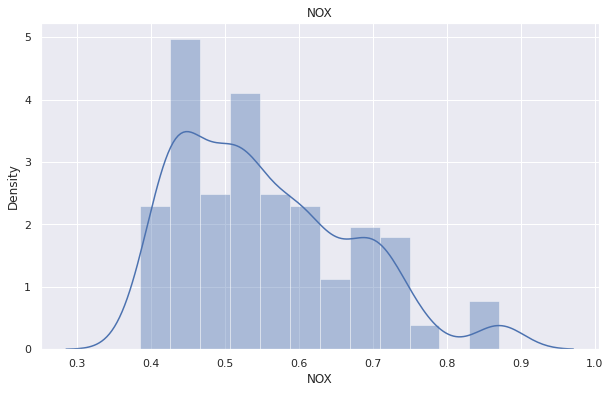

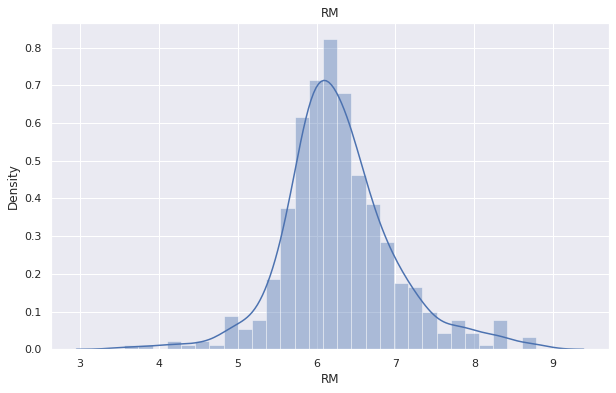

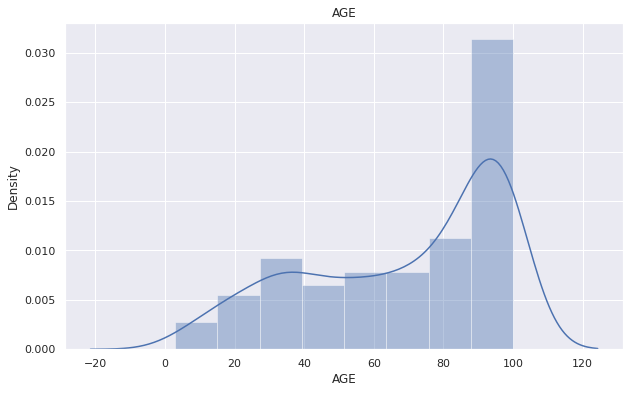

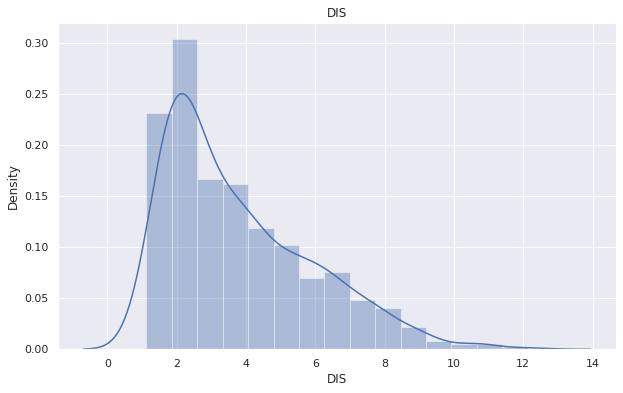

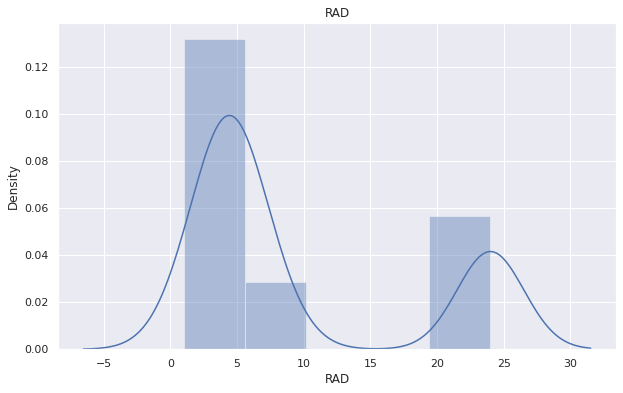

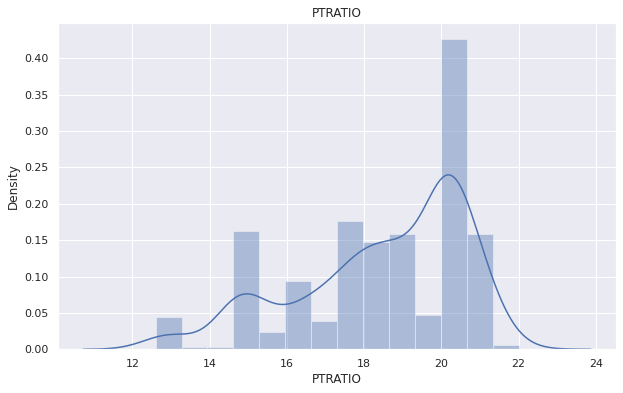

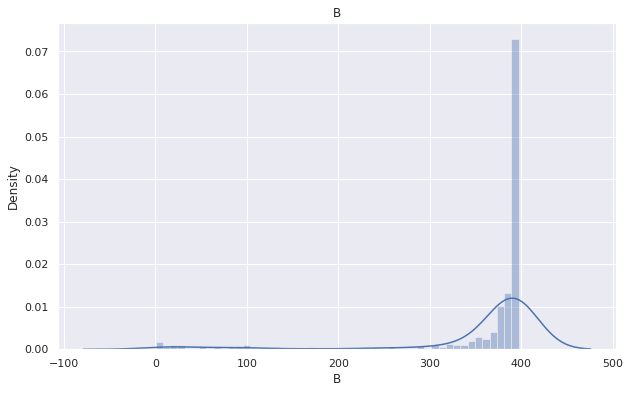

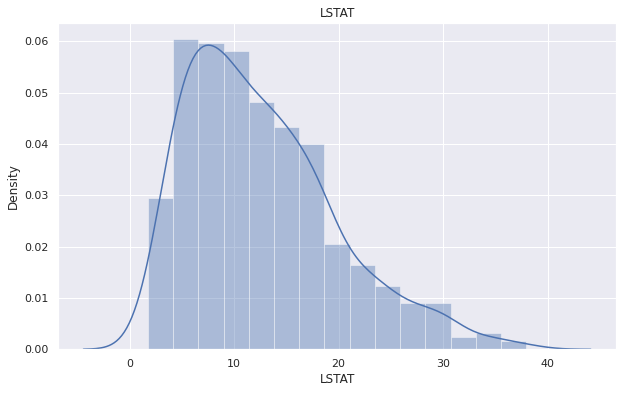

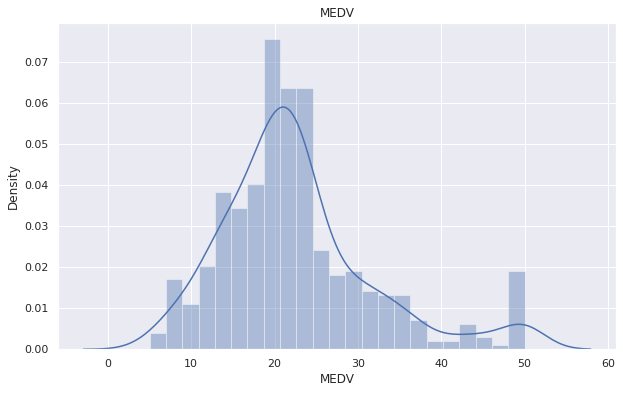

In [23]:
# distplot for checking of skewness
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(train_viz[col])
    plt.title(col)
    plt.show()

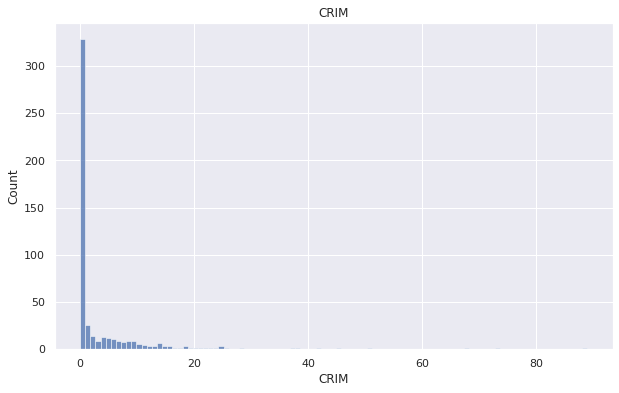

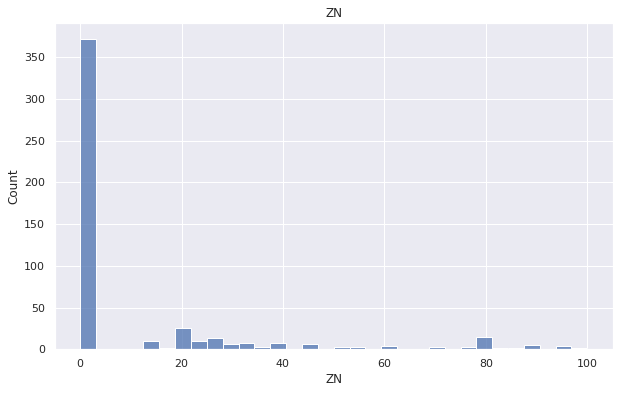

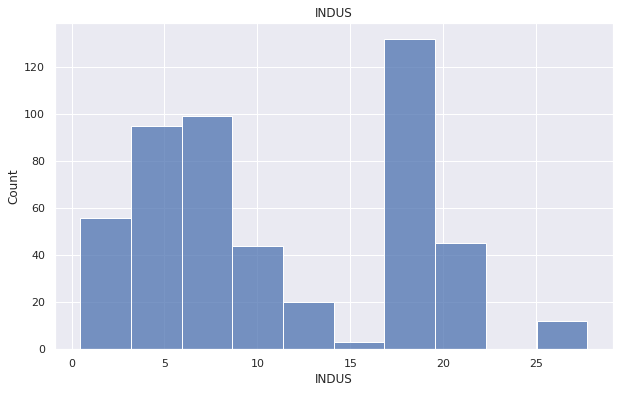

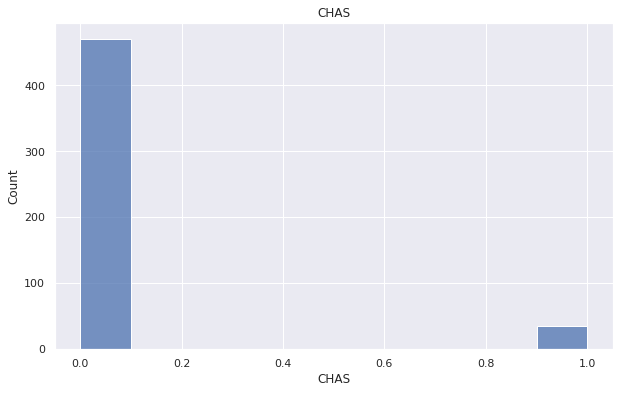

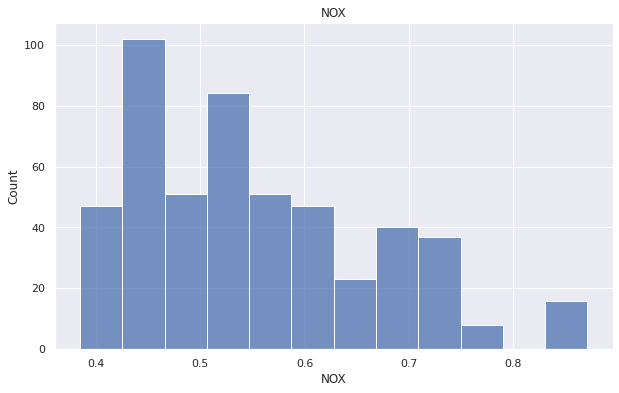

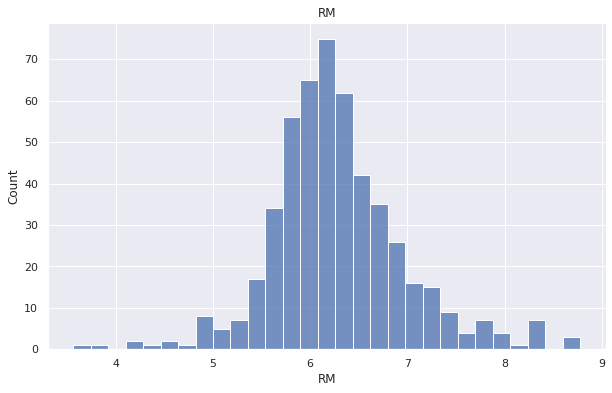

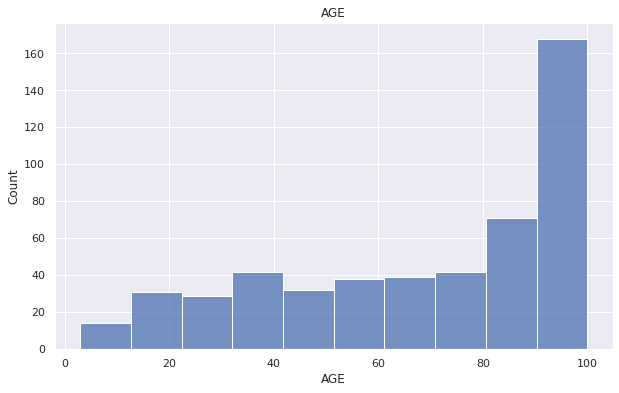

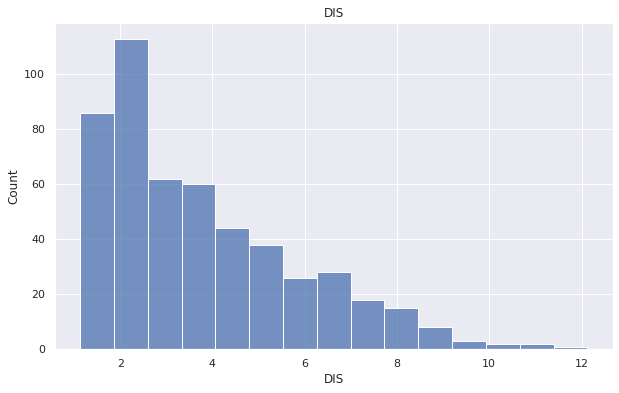

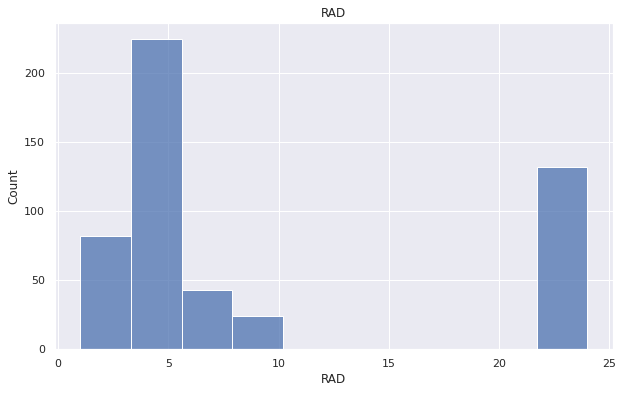

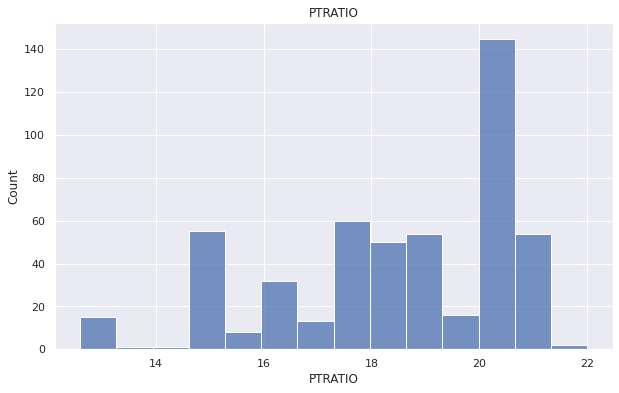

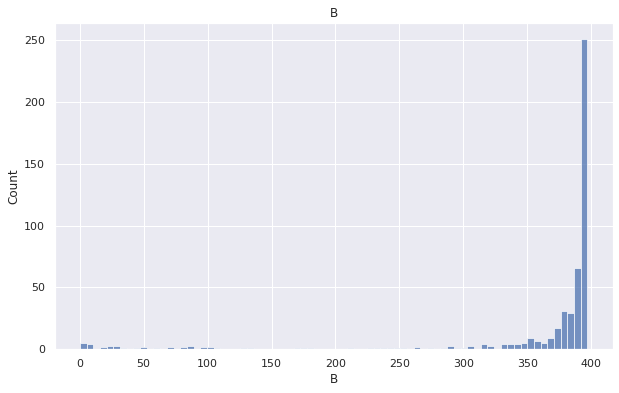

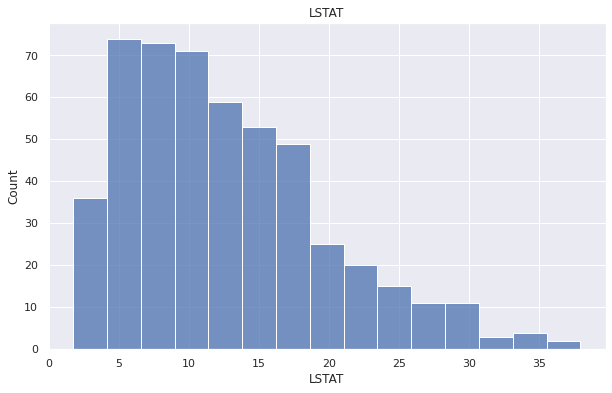

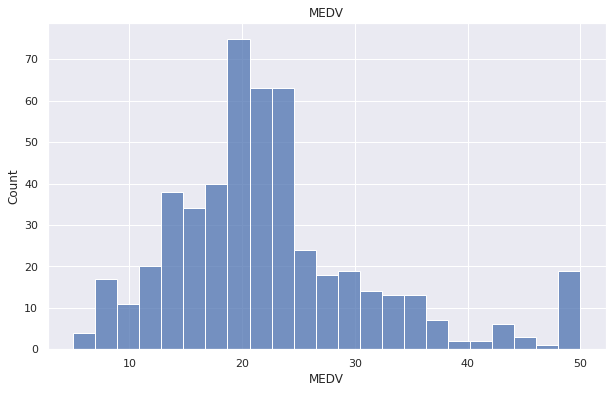

In [24]:
# histogram plot(for checking of skew,gaussian distribution)
for col in cols:
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.histplot(train_viz[col])
    plt.title(col)
    plt.show()

## Transformation

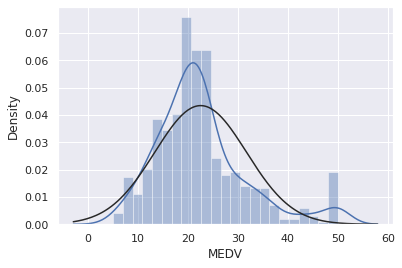

In [25]:
sns.distplot(df['MEDV'],fit=norm);


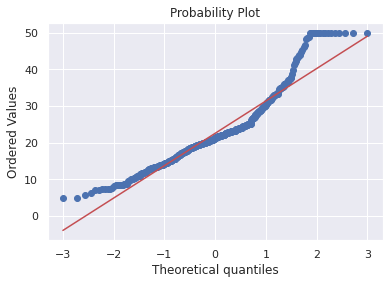

In [26]:
stats.probplot(df['MEDV'],plot=plt)
plt.show()

### Log Transformation of the target variable

In [27]:
df['MEDV']=np.log1p(df["MEDV"])

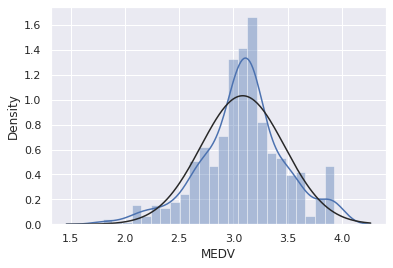

In [28]:
sns.distplot(df['MEDV'],fit=norm);

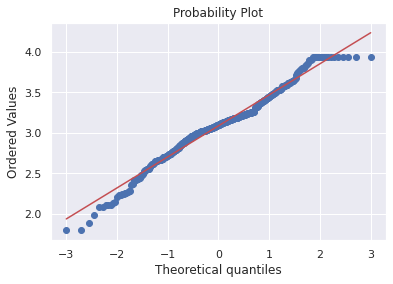

In [29]:
stats.probplot(df['MEDV'],plot=plt)
plt.show()

In [30]:
df.shape

(506, 13)

### Feature Selection

In [31]:
x=df.drop("MEDV",axis=1)
y=df["MEDV"]

In [32]:
mutual_info=mutual_info_regression(x,y,random_state=42)
mutual_info=pd.Series(mutual_info)
mutual_info.index=x.columns
mutual_info.sort_values(ascending=False)*100

LSTAT      67.855
RM         52.547
INDUS      47.214
PTRATIO    42.988
NOX        42.613
CRIM       33.858
AGE        31.111
DIS        29.605
RAD        23.600
ZN         19.641
B          13.911
CHAS        1.914
dtype: float64

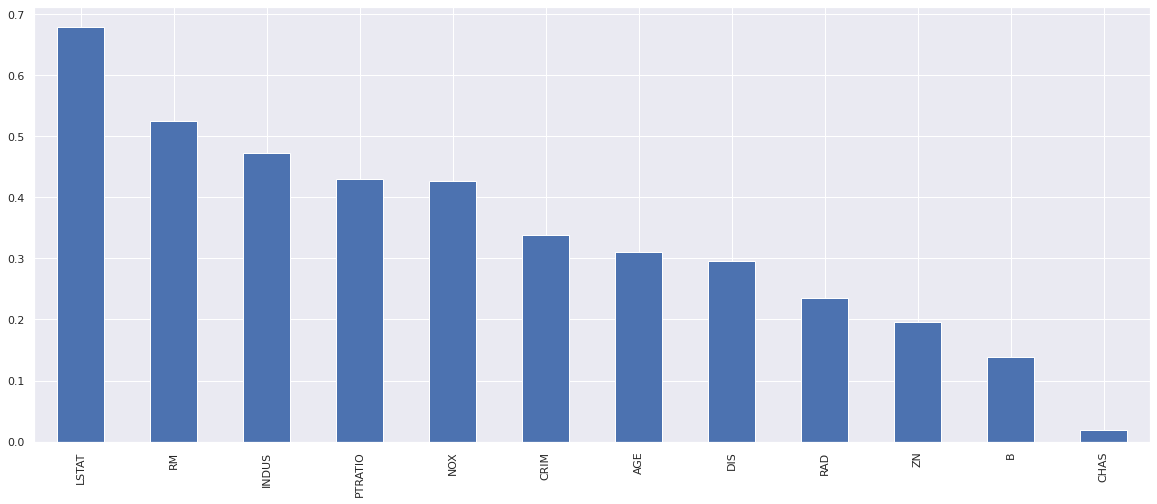

In [33]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

12


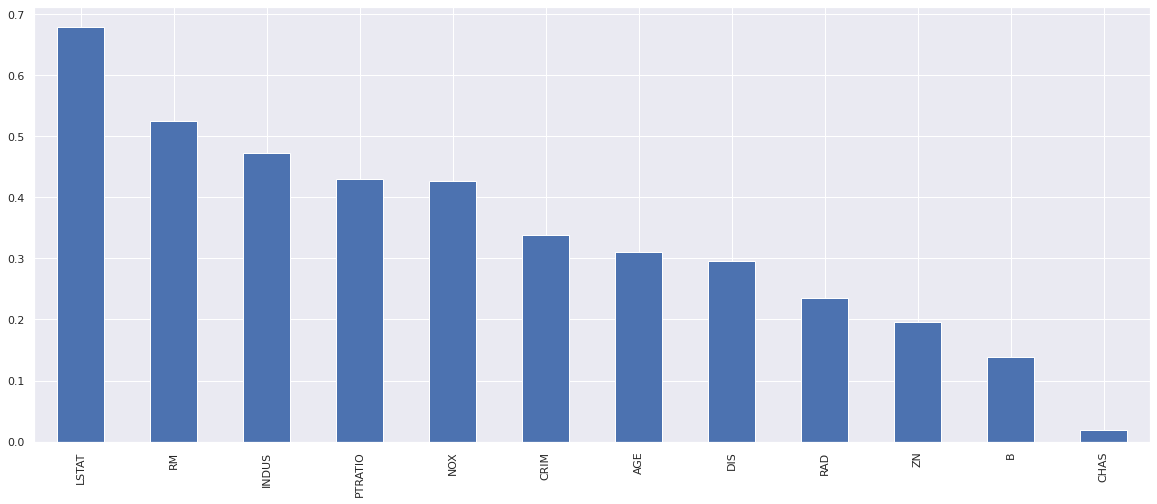

In [34]:
mutual_features=mutual_info.sort_values(ascending=False)[mutual_info.sort_values(ascending=False)!=0.000000]
mutual_features.sort_values(ascending=False).plot.bar(figsize=(20,8))
print(len(mutual_features))

In [35]:
mutual_features.index

Index(['LSTAT', 'RM', 'INDUS', 'PTRATIO', 'NOX', 'CRIM', 'AGE', 'DIS', 'RAD',
       'ZN', 'B', 'CHAS'],
      dtype='object')

In [36]:
mutual_features=mutual_features.index
df=df[mutual_features].join(y)
df.head()

,LSTAT,RM,INDUS,PTRATIO,NOX,CRIM,AGE,DIS,RAD,ZN,B,CHAS,MEDV
0,4.98,6.575,2.31,15.3,0.538,0.006,65.2,4.090,1,18.0,396.90,0,3.219
1,9.14,6.421,7.07,17.8,0.469,0.027,78.9,4.967,2,0.0,396.90,0,3.118
2,4.03,7.185,7.07,17.8,0.469,0.027,61.1,4.967,2,0.0,392.83,0,3.575
3,2.94,6.998,2.18,18.7,0.458,0.032,45.8,6.062,3,0.0,394.63,0,3.538
4,5.33,7.147,2.18,18.7,0.458,0.069,54.2,6.062,3,0.0,396.90,0,3.616


In [37]:
df.shape

(506, 13)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    506 non-null    float64
 1   RM       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   PTRATIO  506 non-null    float64
 4   NOX      506 non-null    float64
 5   CRIM     506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   ZN       506 non-null    float64
 10  B        506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


### Features Importance

In [39]:
feat_im=df.copy()
X = feat_im.iloc[:,0:12] #independent columns
Y = feat_im.iloc[:,-1] #target column 

In [40]:
model=RandomForestRegressor(random_state=42)
model.fit(X,Y)
importance=model.feature_importances_

In [41]:
for i,v in enumerate(importance):
    print('feature : %0d, Score: %.5f' % (i,v))
    

feature : 0, Score: 0.55395
feature : 1, Score: 0.20425
feature : 2, Score: 0.01121
feature : 3, Score: 0.01482
feature : 4, Score: 0.03605
feature : 5, Score: 0.09089
feature : 6, Score: 0.01706
feature : 7, Score: 0.04958
feature : 8, Score: 0.00352
feature : 9, Score: 0.00096
feature : 10, Score: 0.01705
feature : 11, Score: 0.00065


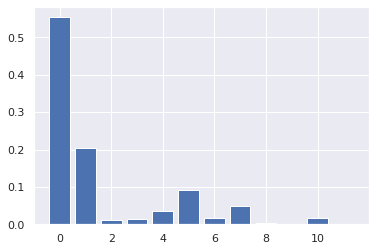

In [42]:
pyplot.bar([X for X in range(len(importance))], importance)
pyplot.show()

In [43]:
feat_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    506 non-null    float64
 1   RM       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   PTRATIO  506 non-null    float64
 4   NOX      506 non-null    float64
 5   CRIM     506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   ZN       506 non-null    float64
 10  B        506 non-null    float64
 11  CHAS     506 non-null    int64  
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [44]:
#features 9 and 11 have no importance to target
feature_importance=["ZN","CHAS"]
df.drop(columns=feature_importance,axis=1,inplace=True)

### Outliers

In [45]:
#removal of outlier
from scipy import stats
import numpy as np
train_out=df.copy()
print("shape of data before outliers :",train_out.shape)
z=np.abs(stats.zscore(df))
df=df[(z<3).all(axis=1)]



print("shape of data after outlier:",df.shape)

shape of data before outliers : (506, 11)
shape of data after outlier: (460, 11)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 505
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LSTAT    460 non-null    float64
 1   RM       460 non-null    float64
 2   INDUS    460 non-null    float64
 3   PTRATIO  460 non-null    float64
 4   NOX      460 non-null    float64
 5   CRIM     460 non-null    float64
 6   AGE      460 non-null    float64
 7   DIS      460 non-null    float64
 8   RAD      460 non-null    int64  
 9   B        460 non-null    float64
 10  MEDV     460 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 43.1 KB


# VALIDATION DATASET

In [47]:
# Split-out validation dataset
array = df.values
X = array[:,0:10]
Y = array[:,10]

validation_size = 0.20
seed = 42
shuffle=True

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed,shuffle=shuffle)

In [48]:
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((368, 10), (92, 10), (368,), (92,))

In [49]:
# Test options and evaluation metric
num_folds = 5
scoring = 'neg_mean_absolute_error'

In [50]:

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    
    print("----------------------------------")
    print('MAE:', mae)
    print("----------------------------------")
    print('MSE:', mse)
    print("----------------------------------")
    print('RMSE:', rmse)
    print("----------------------------------")
    print('R2 Square', r2_square)
    print("----------------------------------")
   
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [51]:
# Spot-Check Algorithms
models = []

#Standard Scale Algorithms(linear and non-linear algorithms)
models.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
models.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
models.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN',ElasticNet())])))
models.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsRegressor())])))
models.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeRegressor())])))
models.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

#Standard Scale Algorithms(Ensemble algorithms)
models.append(('Standard-Scaled-AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])))
models.append(('Standard-Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
models.append(('Standard-Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))
models.append(('Standard-Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesRegressor())])))
models.append(('Standard-Scaled-LGBMC', Pipeline([('Scaler', StandardScaler()),('LGBMC', LGBMRegressor())])))
models.append(('Standard-Scaled-XGBC', Pipeline([('Scaler', StandardScaler()),('XGBC', XGBRegressor(verbosity=0))])))
models.append(('Standard-Scaled-Cat', Pipeline([('Scaler', StandardScaler()),('Cat', CatBoostRegressor(verbose=False))])))


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -0.127509 (0.021347)
ScaledLASSO: -0.257982 (0.036659)
ScaledEN: -0.257982 (0.036659)
ScaledKNN: -0.112720 (0.016577)
ScaledCART: -0.137223 (0.027771)
ScaledSVR: -0.103005 (0.012530)
Standard-Scaled-AB: -0.119708 (0.014397)
Standard-Scaled-GBM: -0.099331 (0.017568)
Standard-Scaled-RF: -0.101396 (0.022482)
Standard-Scaled-ET: -0.098549 (0.021161)
Standard-Scaled-LGBMC: -0.108343 (0.013823)
Standard-Scaled-XGBC: -0.105501 (0.015834)
Standard-Scaled-Cat: -0.097097 (0.013788)


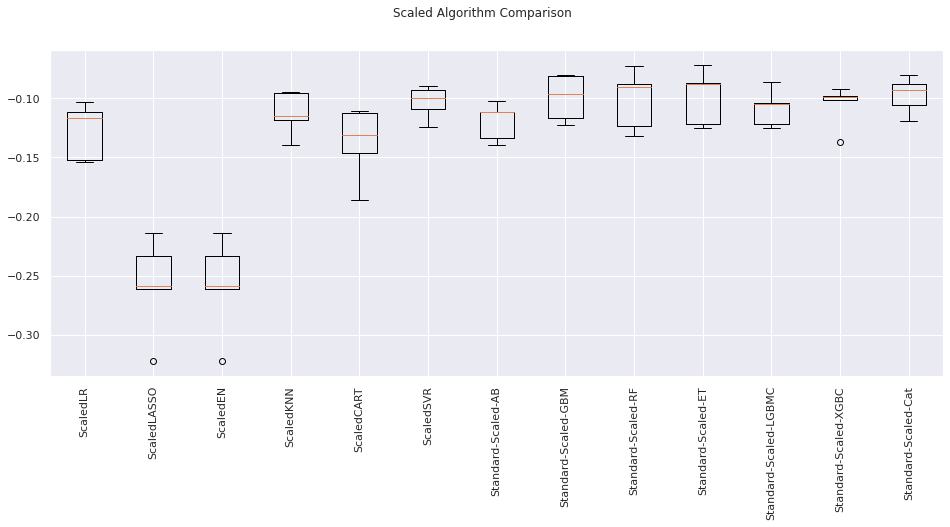

In [52]:
# Compare Algorithms
fig = plt.figure(figsize=(16,6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

# ***Boxplot Diagram***
* ****Linear/Non Linear Algorithms***. 
1. Linear Regression
2. Lasso
3. ElasticNet
4. Decision Tree Regression
5. KNeighbors Regression
6. SVR

* ****Ensemble Algorithms***. 
1. AdaBoost Regression
2. ExtraTrees Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. Light GradientBoosting Regression
6. CatBoost Regression 

* The Boxplot above show Lasso and ElasticNet with very low mean score (neg_mean_absolute_error)
* All ensemble ALgorithm show a promising and high mean score (neg_mean_absolute_error)
* Hence Ensemble algorithm should be use for my predictive modelling

In [53]:
# Tune scaled AdaBoostRegressor()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,150]
learning_rate=[0.1,0.01,0.001,1.0]

param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
model =AdaBoostRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_AdaBoostRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_AdaBoostRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- AdaBoostRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("----------------------------------")


# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
AdaBoost_model = AdaBoostRegressor(random_state=seed,**grid_AdaBoostRegressor.best_params_)
AdaBoost_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = AdaBoost_model.predict(rescaledValidationX)

#Prediction on test/train sets
test_pred = AdaBoost_model.predict(rescaledValidationX)
train_pred = AdaBoost_model.predict(rescaledX)

print('Test set evaluation:\n')
print_evaluate(Y_validation, test_pred)
print('Train set evaluation:\n')
print_evaluate(Y_train, train_pred)

-----------------------------------------------------------
Model : -------- AdaBoostRegressor -------- 
-----------------------------------------------------------
Best: -0.113336 using {'learning_rate': 0.1, 'n_estimators': 100}
----------------------------------
Test set evaluation:

----------------------------------
MAE: 0.10705666081785079
----------------------------------
MSE: 0.01783372905255872
----------------------------------
RMSE: 0.13354298578569643
----------------------------------
R2 Square 0.8532972745374304
----------------------------------
Train set evaluation:

----------------------------------
MAE: 0.09456697445635749
----------------------------------
MSE: 0.01502328236746815
----------------------------------
RMSE: 0.12256950015182468
----------------------------------
R2 Square 0.8760004923801661
----------------------------------


In [54]:
results_df = pd.DataFrame(data=[["AdaBoostRegressor", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,AdaBoostRegressor,0.107,0.018,0.134,0.853


In [55]:
#Tune scaled ExtraTreesRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split = [2,3,4,5]
min_samples_leaf= [2,3,4,5]

param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_ExtraTreesRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_ExtraTreesRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- ExtraTreesRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
ExtraTrees_model = ExtraTreesRegressor(random_state=seed,**grid_ExtraTreesRegressor.best_params_)
ExtraTrees_model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = ExtraTrees_model.predict(rescaledValidationX)

#Prediction on test/train sets
test_pred = ExtraTrees_model.predict(rescaledValidationX)
train_pred = ExtraTrees_model.predict(rescaledX)

print('Test set evaluation:\n')
print_evaluate(Y_validation, test_pred)
print('Train set evaluation:\n')
print_evaluate(Y_train, train_pred)

-----------------------------------------------------------
Model : -------- ExtraTreesRegressor -------- 
-----------------------------------------------------------
Best: -0.097916 using {'min_samples_leaf': 2, 'min_samples_split': 2}
-----------------------------------------------------------
Test set evaluation:

----------------------------------
MAE: 0.08381901050489521
----------------------------------
MSE: 0.009875313964401746
----------------------------------
RMSE: 0.09937461428554954
----------------------------------
R2 Square 0.9187642994290951
----------------------------------
Train set evaluation:

----------------------------------
MAE: 0.03094362525620924
----------------------------------
MSE: 0.002270576172252985
----------------------------------
RMSE: 0.04765056318925292
----------------------------------
R2 Square 0.981259067060979
----------------------------------


In [56]:
results_df_2 = pd.DataFrame(data=[["ExtraTreesRegressor", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_2, ignore_index=True).sort_values(by='R2 Square',ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Square
1,ExtraTreesRegressor,0.084,0.010,0.099,0.919
0,AdaBoostRegressor,0.107,0.018,0.134,0.853


In [57]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=numpy.array([50,100,150,200,250,300,350,400]))

model = model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_GradientBoostingRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_GradientBoostingRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- GradientBoostingRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed,**grid_GradientBoostingRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

#Prediction on test/train sets
test_pred = model.predict(rescaledValidationX)
train_pred = model.predict(rescaledX)

print('Test set evaluation:\n')
print_evaluate(Y_validation, test_pred)
print('Train set evaluation:\n')
print_evaluate(Y_train, train_pred)

-----------------------------------------------------------
Model : -------- GradientBoostingRegressor -------- 
-----------------------------------------------------------
Best: -0.098511 using {'n_estimators': 150}
-----------------------------------------------------------
Test set evaluation:

----------------------------------
MAE: 0.08220409170717877
----------------------------------
MSE: 0.010974697651324791
----------------------------------
RMSE: 0.10476019115735133
----------------------------------
R2 Square 0.9097206169370389
----------------------------------
Train set evaluation:

----------------------------------
MAE: 0.035515678674216726
----------------------------------
MSE: 0.0020702787231764337
----------------------------------
RMSE: 0.04550031563820666
----------------------------------
R2 Square 0.9829122866740766
----------------------------------


In [58]:
results_df_3 = pd.DataFrame(data=[["GradientBoostingRegressor", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_3, ignore_index=True).sort_values(by='R2 Square',ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,ExtraTreesRegressor,0.084,0.010,0.099,0.919
2,GradientBoostingRegressor,0.082,0.011,0.105,0.910
1,AdaBoostRegressor,0.107,0.018,0.134,0.853


In [59]:
# Tune scaled Randomforest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

min_samples_split = [2,3,4,5,6]
min_samples_leaf= [1,2,3,4]
n_estimators=[10,15,20,25,30]

param_grid = dict(min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators)
model = RandomForestRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_RandomForestRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_RandomForestRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- RandomForestRegressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestRegressor(random_state=seed,**grid_RandomForestRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

#Prediction on test/train sets
test_pred = model.predict(rescaledValidationX)
train_pred = model.predict(rescaledX)

print('Test set evaluation:\n')
print_evaluate(Y_validation, test_pred)
print('Train set evaluation:\n')
print_evaluate(Y_train, train_pred)

-----------------------------------------------------------
Model : -------- RandomForestRegressor -------- 
-----------------------------------------------------------
Best: -0.099920 using {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 25}
-----------------------------------------------------------
Test set evaluation:

----------------------------------
MAE: 0.0923383241809974
----------------------------------
MSE: 0.01386179230464754
----------------------------------
RMSE: 0.11773611300126881
----------------------------------
R2 Square 0.885970976406861
----------------------------------
Train set evaluation:

----------------------------------
MAE: 0.046274674717643974
----------------------------------
MSE: 0.005753580232342531
----------------------------------
RMSE: 0.07585235811985366
----------------------------------
R2 Square 0.9525109694132762
----------------------------------


In [60]:
results_df_4 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_4, ignore_index=True).sort_values(by='R2 Square',ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,ExtraTreesRegressor,0.084,0.010,0.099,0.919
1,GradientBoostingRegressor,0.082,0.011,0.105,0.910
3,RandomForestRegressor,0.092,0.014,0.118,0.886
2,AdaBoostRegressor,0.107,0.018,0.134,0.853


In [61]:
# Tune scaled LGBMRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[15,25,35,50]

param_grid = dict(n_estimators=n_estimators)
model = LGBMRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_LGBMRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_LGBMRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Light GradientBoosting Regressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LGBMRegressor(random_state=seed,**grid_LGBMRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

#Prediction on test/train sets
test_pred = model.predict(rescaledValidationX)
train_pred = model.predict(rescaledX)

print('Test set evaluation:\n')
print_evaluate(Y_validation, test_pred)
print('Train set evaluation:\n')
print_evaluate(Y_train, train_pred)

-----------------------------------------------------------
Model : -------- Light GradientBoosting Regressor -------- 
-----------------------------------------------------------
Best: -0.105035 using {'n_estimators': 50}
-----------------------------------------------------------
Test set evaluation:

----------------------------------
MAE: 0.09087083599821488
----------------------------------
MSE: 0.013626039111574692
----------------------------------
RMSE: 0.1167306262793732
----------------------------------
R2 Square 0.8879103148289241
----------------------------------
Train set evaluation:

----------------------------------
MAE: 0.05541585119789334
----------------------------------
MSE: 0.007466640723174809
----------------------------------
RMSE: 0.0864097258598522
----------------------------------
R2 Square 0.9383716720087243
----------------------------------


In [62]:
results_df_5 = pd.DataFrame(data=[["LGBMRegressor", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_5, ignore_index=True).sort_values(by='R2 Square',ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,ExtraTreesRegressor,0.084,0.010,0.099,0.919
1,GradientBoostingRegressor,0.082,0.011,0.105,0.910
4,LGBMRegressor,0.091,0.014,0.117,0.888
2,RandomForestRegressor,0.092,0.014,0.118,0.886
3,AdaBoostRegressor,0.107,0.018,0.134,0.853


In [63]:
#prevent CatBoostRegressor to throw out error
class CatBoostRegressor(CatBoostRegressor):
    def _get_tags(self):
        return {'pairwise' : False}

In [64]:
# Tune scaled CatBoostRegressor
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
learning_rate=[0.1,0.01]
param_grid = dict(learning_rate=learning_rate)
model = CatBoostRegressor(random_state=seed,verbose=False)
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_CatBoostRegressor = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_CatBoostRegressor.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- CatBoost Regressor -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostRegressor(random_state=seed,verbose=False,**grid_CatBoostRegressor.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

#Prediction on test/train sets
test_pred = model.predict(rescaledValidationX)
train_pred = model.predict(rescaledX)

print('Test set evaluation:\n')
print_evaluate(Y_validation, test_pred)
print('Train set evaluation:\n')
print_evaluate(Y_train, train_pred)

-----------------------------------------------------------
Model : -------- CatBoost Regressor -------- 
-----------------------------------------------------------
Best: -0.098864 using {'learning_rate': 0.01}
-----------------------------------------------------------
Test set evaluation:

----------------------------------
MAE: 0.08106293221319592
----------------------------------
MSE: 0.009480761870486888
----------------------------------
RMSE: 0.09736920391215535
----------------------------------
R2 Square 0.9220099396058459
----------------------------------
Train set evaluation:

----------------------------------
MAE: 0.05315783964480034
----------------------------------
MSE: 0.004942925912769483
----------------------------------
RMSE: 0.07030594507415061
----------------------------------
R2 Square 0.9592019663617606
----------------------------------


In [65]:
results_df_6 = pd.DataFrame(data=[["CatBoostRegressor", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

results_df = results_df.append(results_df_6, ignore_index=True).sort_values(by='R2 Square',ascending=False)
results_df

,Model,MAE,MSE,RMSE,R2 Square
5,CatBoostRegressor,0.081,0.009,0.097,0.922
0,ExtraTreesRegressor,0.084,0.010,0.099,0.919
1,GradientBoostingRegressor,0.082,0.011,0.105,0.910
2,LGBMRegressor,0.091,0.014,0.117,0.888
3,RandomForestRegressor,0.092,0.014,0.118,0.886
4,AdaBoostRegressor,0.107,0.018,0.134,0.853


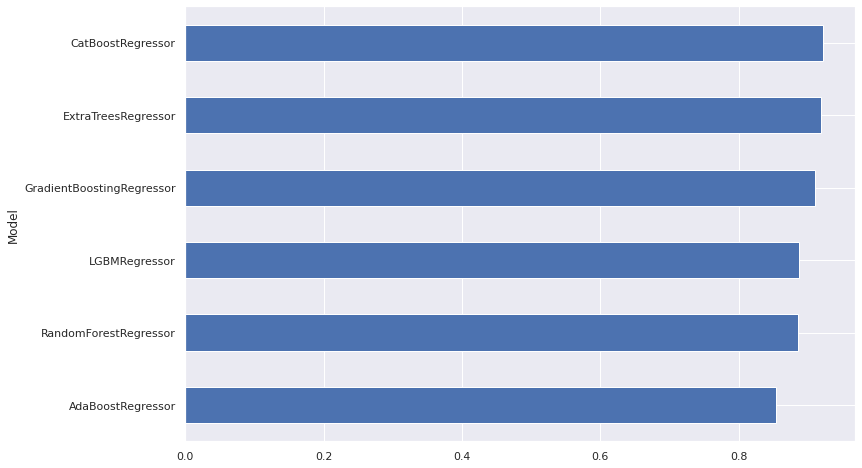

In [66]:
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 8)) #barh stands for bar histogram 

In [67]:
#training set for best model
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostRegressor(random_state=seed,**grid_CatBoostRegressor.best_params_,verbose=False)
model.fit(rescaledX, Y_train)
# transform the validation dataset
print("mean absolute error",mean_absolute_error(Y_train, train_pred))
print("mean square error",mean_squared_error(Y_train, train_pred))
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_train, train_pred)))
print("r-square",r2_score(Y_train, train_pred))

mean absolute error 0.05315783964480034
mean square error 0.004942925912769483
mean root_mean_squared_error 0.07030594507415061
r-square 0.9592019663617606


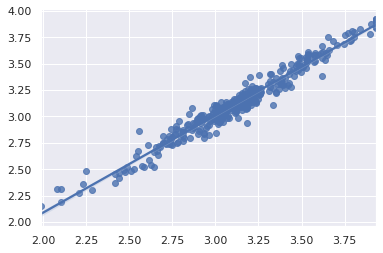

In [68]:
# regplot for training set for best model
sns.regplot(x=Y_train,y=train_pred)

In [69]:
# test set for best model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostRegressor(random_state=seed,**grid_CatBoostRegressor.best_params_,verbose=False)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
print("----------------------------------")
print("mean absolute error",mean_absolute_error(Y_validation, test_pred))
print("----------------------------------")
print("mean square error",mean_squared_error(Y_validation, test_pred))
print("----------------------------------")
print("mean root_mean_squared_error",np.sqrt(mean_squared_error(Y_validation, test_pred)))
print("----------------------------------")
print("R-square",r2_score(Y_validation, test_pred))
print("----------------------------------")

----------------------------------
mean absolute error 0.08106293221319592
----------------------------------
mean square error 0.009480761870486888
----------------------------------
mean root_mean_squared_error 0.09736920391215535
----------------------------------
R-square 0.9220099396058459
----------------------------------


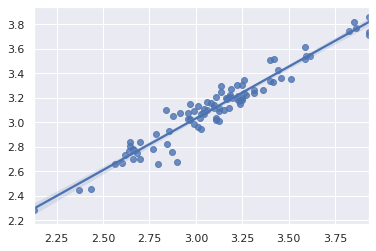

In [70]:
# regplot for test set for best model
sns.regplot(x=Y_validation,y=test_pred)